<a href="https://colab.research.google.com/github/Benylaode/CNN_PART1/blob/main/Tugas_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = Image.open('Boruto.jpg')
image.show()

In [ ]:
image_ar = np.array(image)

R  (1053, 735)
G  (1053, 735)
B  (1053, 735)


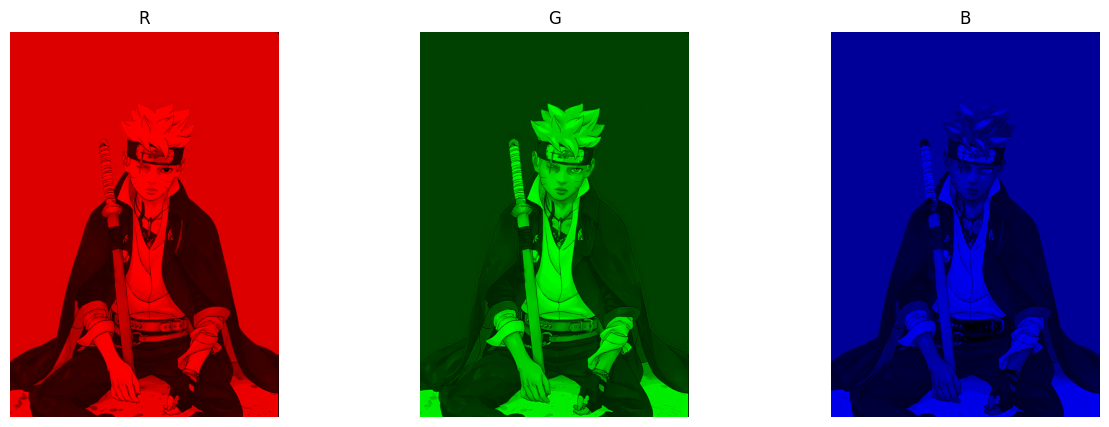

In [ ]:
if image.mode == 'RGB':
    R = image_ar[:,:,0]
    G = image_ar[:,:,1]
    B = image_ar[:,:,2]

    print("R ",R.shape)
    print("G ",G.shape)
    print("B ",B.shape)

    R_nor = R/255
    G_nor = G/255
    B_nor = B/255

    R_img = np.zeros_like(image_ar)
    G_img = np.zeros_like(image_ar)
    B_img = np.zeros_like(image_ar)

    R_img[:,:,0] = R
    G_img[:,:,1] = G
    B_img[:,:,2] = B

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))


    axs[0].imshow(R_img)
    axs[0].set_title('R')

    axs[1].imshow(G_img)
    axs[1].set_title('G')

    axs[2].imshow(B_img)
    axs[2].set_title('B')

    for axs in axs:
        axs.axis('off')

    plt.show()

else :
    print("not RGB")


Text(0.5, 1.0, 'Grayscale Image')

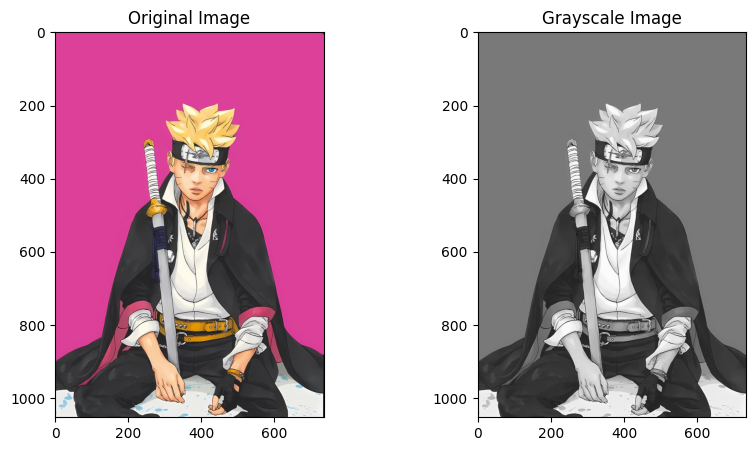

In [ ]:
grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_ar)
axs[0].set_title('Original Image')

axs[1].imshow(grayscale, cmap='gray')
axs[1].set_title('Grayscale Image')


In [ ]:
def apply_convolution(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    output_image = np.zeros_like(image)

    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output_image[i, j] = np.sum(region * kernel)
    return output_image

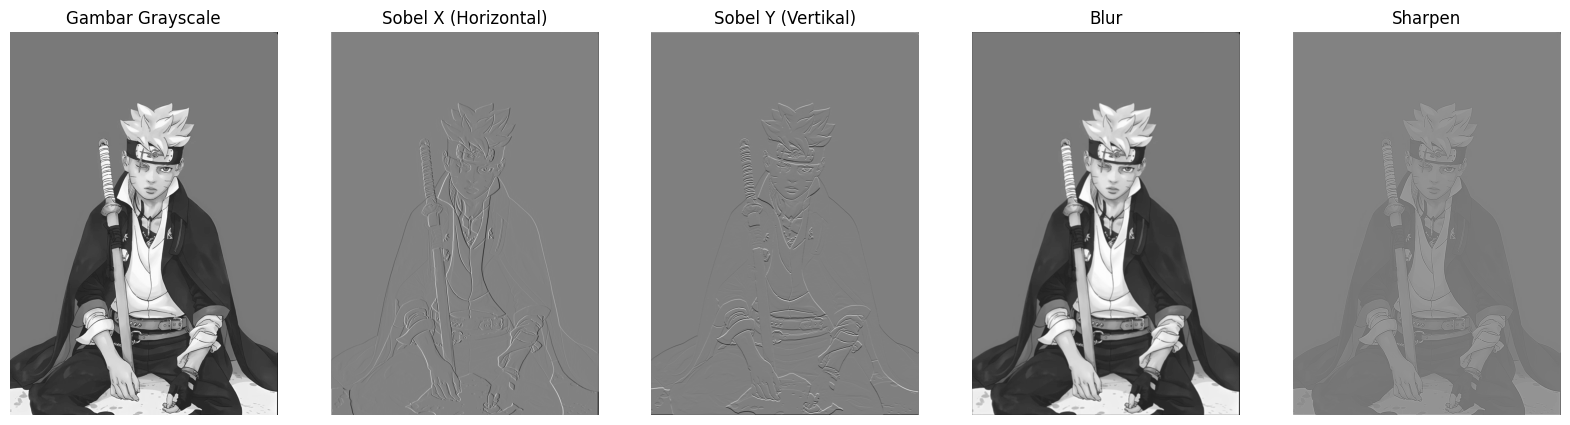

In [ ]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Deteksi tepi horizontal
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Deteksi tepi vertikal
blur = np.ones((3, 3)) / 9
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Kernel sharpen


convolved_sobel_x = apply_convolution(grayscale, sobel_x)
convolved_sobel_y = apply_convolution(grayscale, sobel_y)
convolved_blur = apply_convolution(grayscale, blur)
convolved_sharpen = apply_convolution(grayscale, sharpen)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(grayscale, cmap='gray')
axs[0].set_title("Gambar Grayscale")

axs[1].imshow(convolved_sobel_x, cmap='gray')
axs[1].set_title("Sobel X (Horizontal)")

axs[2].imshow(convolved_sobel_y, cmap='gray')
axs[2].set_title("Sobel Y (Vertikal)")

axs[3].imshow(convolved_blur, cmap='gray')
axs[3].set_title("Blur")


axs[4].imshow(convolved_sharpen, cmap='gray')
axs[4].set_title("Sharpen")

for ax in axs:
    ax.axis('off')

plt.show()

In [ ]:

def max_pooling(image, pool_size=2):
    img_height, img_width = image.shape
    out_height = img_height // pool_size
    out_width = img_width // pool_size
    pooled_image = np.zeros((out_height, out_width))
    for i in range(0, out_height * pool_size, pool_size):
        for j in range(0, out_width * pool_size, pool_size):
            pooled_image[i//pool_size, j//pool_size] = np.max(image[i:i+pool_size, j:j+pool_size])
    return pooled_image


def avg_pooling(image, pool_size=2):
    img_height, img_width = image.shape
    out_height = img_height // pool_size
    out_width = img_width // pool_size
    pooled_image = np.zeros((out_height, out_width))
    for i in range(0, out_height * pool_size, pool_size):
        for j in range(0, out_width * pool_size, pool_size):
            pooled_image[i//pool_size, j//pool_size] = np.mean(image[i:i+pool_size, j:j+pool_size])
    return pooled_image


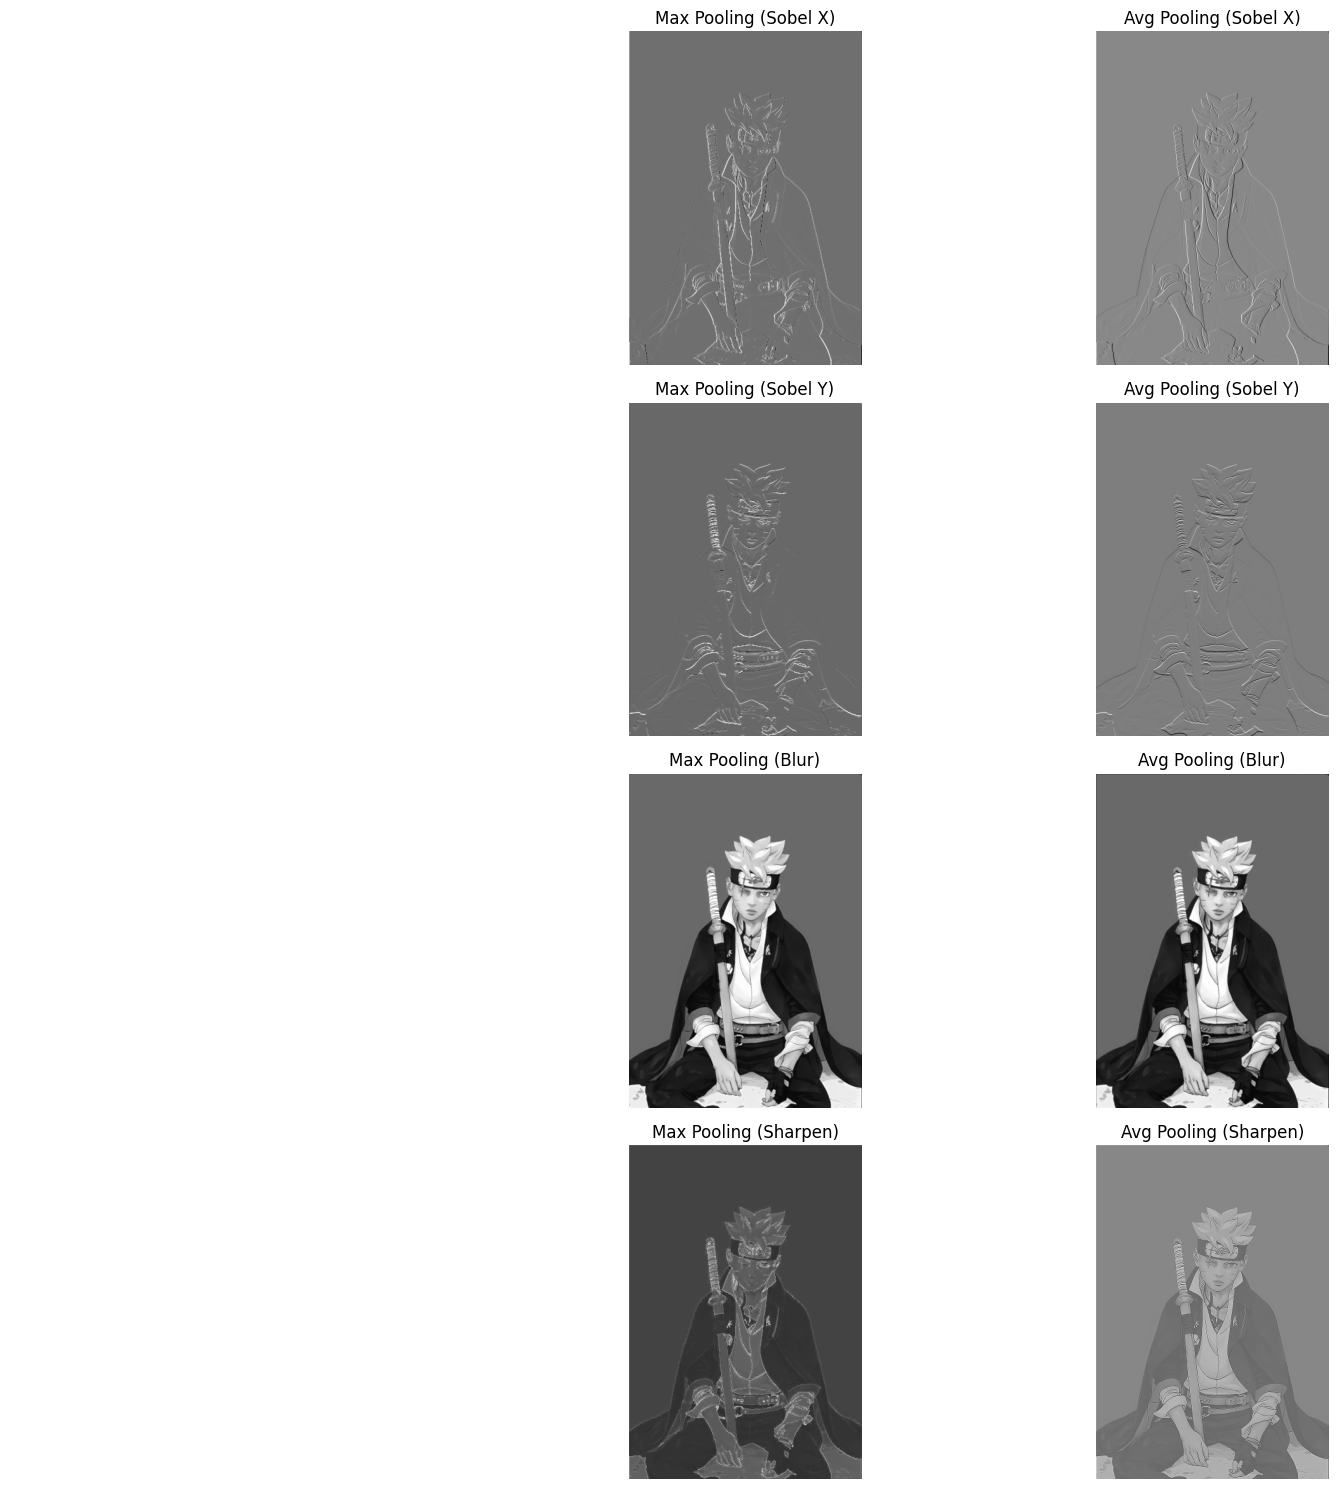

In [ ]:
max_pooled_sobel_x = max_pooling(convolved_sobel_x, pool_size=2)
avg_pooled_sobel_x = avg_pooling(convolved_sobel_x, pool_size=2)

max_pooled_sobel_y = max_pooling(convolved_sobel_y, pool_size=2)
avg_pooled_sobel_y = avg_pooling(convolved_sobel_y, pool_size=2)

max_pooled_blur = max_pooling(convolved_blur, pool_size=2)
avg_pooled_blur = avg_pooling(convolved_blur, pool_size=2)

max_pooled_sharpen = max_pooling(convolved_sharpen, pool_size=2)
avg_pooled_sharpen = avg_pooling(convolved_sharpen, pool_size=2)

fig, axs = plt.subplots(4, 3, figsize=(15, 15))


axs[0, 1].imshow(max_pooled_sobel_x, cmap='gray')
axs[0, 1].set_title("Max Pooling (Sobel X)")

axs[1, 1].imshow(max_pooled_sobel_y, cmap='gray')
axs[1, 1].set_title("Max Pooling (Sobel Y)")

axs[2, 1].imshow(max_pooled_blur, cmap='gray')
axs[2, 1].set_title("Max Pooling (Blur)")

axs[3, 1].imshow(max_pooled_sharpen, cmap='gray')
axs[3, 1].set_title("Max Pooling (Sharpen)")


axs[0, 2].imshow(avg_pooled_sobel_x, cmap='gray')
axs[0, 2].set_title("Avg Pooling (Sobel X)")

axs[1, 2].imshow(avg_pooled_sobel_y, cmap='gray')
axs[1, 2].set_title("Avg Pooling (Sobel Y)")

axs[2, 2].imshow(avg_pooled_blur, cmap='gray')
axs[2, 2].set_title("Avg Pooling (Blur)")

axs[3, 2].imshow(avg_pooled_sharpen, cmap='gray')
axs[3, 2].set_title("Avg Pooling (Sharpen)")


for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
sobel_x_faltten = max_pooled_sobel_x.flatten()
sobel_y_faltten = max_pooled_sobel_y.flatten()
blue_faltten = max_pooled_blur.flatten()
sharpen_faltten = max_pooled_sharpen.flatten()

print(sobel_x_faltten)
print(sobel_y_faltten)
print(blue_faltten)
print(sharpen_faltten)

[ 484.2676    0.        0.     ...   27.9972   23.9976 -559.944 ]
[4.84267600e+02 4.84267600e+02 4.84267600e+02 ... 0.00000000e+00
 5.68434189e-14 3.55271368e-15]
[121.0669 121.0669 121.0669 ... 246.642  250.6416 134.9865]
[363.2007 242.1338 242.1338 ... 255.9744 366.9633 194.9805]
